In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

path_mb_data = f"/Users/kjkelly/Dropbox/GitHub/muB_oscillation/MicroTools/MB_data/"
path_mb_data_release = f"{path_mb_data}/data_release_2018/"
mb_data_osctables = f"{path_mb_data}/MB_osc_tables/"
MiniBooNE_Signal_PANM_True = np.loadtxt(f"{mb_data_osctables}/dm-MB-events-table-TrueEnu.dat")

mb_release_mc = np.loadtxt("/Users/kjkelly/Downloads/miniboone_numunuefullosc_ntuple.txt")
MB_EReco_Bins = [0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000]
MB_EReco_Bin_Centers = np.array(MB_EReco_Bins[:-1]) + np.diff(MB_EReco_Bins)/2.

In [2]:
e_reco = mb_release_mc[:,0]/1000.
e_prod = mb_release_mc[:,1]/1000.
weights = mb_release_mc[:,3]

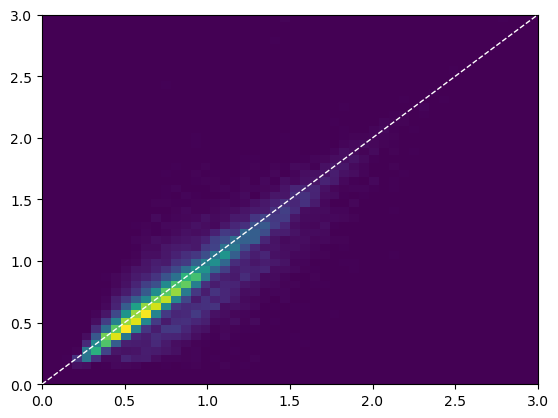

In [3]:
plt.hist2d(e_prod, e_reco, bins=[np.linspace(0, 3, 51), np.linspace(0, 3, 51)], weights = mb_release_mc[:,-1])
plt.gca().set_xlim([0, 3])
plt.gca().set_ylim([0, 3])
plt.plot([0, 3], [0, 3], lw=1, color='w', ls='--', zorder=100)

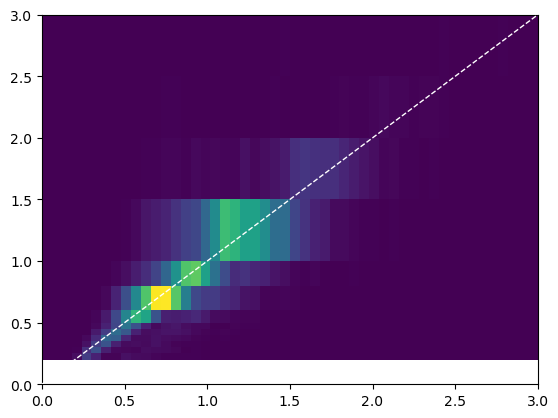

In [4]:
plt.hist2d(e_prod, e_reco, bins=[np.linspace(0, 3, 51), MB_EReco_Bins], weights = mb_release_mc[:,-1])
plt.gca().set_xlim([0, 3])
plt.gca().set_ylim([0, 3])
plt.plot([0, 3], [0, 3], lw=1, color='w', ls='--', zorder=100)

In [5]:
e_prod_e_int_bins = np.linspace(0, 3, 51)
h0_unnorm = np.histogram2d(e_prod, e_reco, bins=[e_prod_e_int_bins, MB_EReco_Bins], weights = mb_release_mc[:,-1])[0]
migration_matrix = copy.deepcopy(h0_unnorm)
for j in range(len(e_prod_e_int_bins)-1):
    row_sum = np.sum(h0_unnorm[j])
    if row_sum < 0.0:
        print("negative row?")
    if row_sum == 0.0:
        continue
    migration_matrix[j] = h0_unnorm[j]/row_sum

In [6]:
np.shape(migration_matrix)

(50, 13)

In [7]:
def e_prod_to_e_int(e_prod_test, weight_test, n_replications = 10):
    e_int_bin_edges = np.linspace(0, e_prod_test, n_replications+1)
    e_int_bin_centers = (e_int_bin_edges[1:] + e_int_bin_edges[:-1])/2.
    bin_weights = weight_test*np.array([(1 + 2*j)/n_replications**2 for j in range(n_replications)])
    return np.transpose([e_int_bin_centers, bin_weights])

def e_prod_to_e_int_delta(e_prod_test, weight_test, n_replications=10):
    bin_weights = np.array([weight_test/n_replications for j in range(n_replications)])
    energies = [e_prod_test for j in range(n_replications)]
    return np.transpose([energies, bin_weights])

In [8]:
decay_e_prod, decay_e_weights = np.transpose(np.concatenate([e_prod_to_e_int(e_prod[i], weights[i]) for i in range(len(e_prod))]))
decay_e_reco_distribution = np.dot((np.histogram(decay_e_prod, bins=e_prod_e_int_bins, weights=decay_e_weights)[0]), migration_matrix)

In [9]:
decay_e_prod_delta, decay_e_weights_delta = np.transpose(np.concatenate([e_prod_to_e_int_delta(e_prod[i], weights[i]) for i in range(len(e_prod))]))
decay_e_reco_distribution_delta = np.dot((np.histogram(decay_e_prod_delta, bins=e_prod_e_int_bins, weights=decay_e_weights_delta)[0]), migration_matrix)

(array([9.47497254e+07, 1.27919401e+08, 1.52326593e+08, 2.16420837e+08,
        2.49210852e+08, 2.58767404e+08, 5.62492635e+08, 1.13003756e+09,
        9.13333816e+08, 1.17874456e+09, 2.73067007e+08, 3.38306774e+07,
        8.74603446e+06]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x1133a5870>])

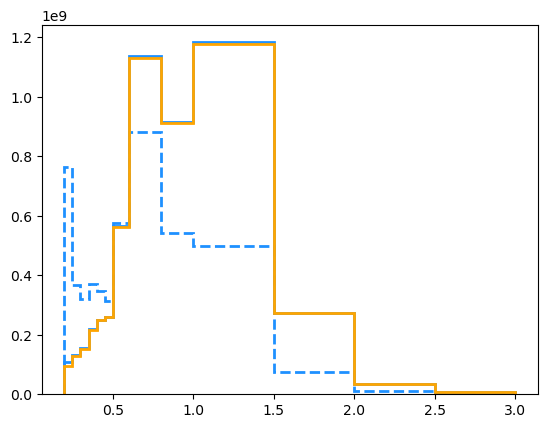

In [10]:
plt.hist(MB_EReco_Bin_Centers, bins=MB_EReco_Bins, weights=decay_e_reco_distribution_delta, histtype='step', color='dodgerblue', lw=2, label='Decay')
plt.hist(MB_EReco_Bin_Centers, bins=MB_EReco_Bins, weights=decay_e_reco_distribution, histtype='step', color='dodgerblue', lw=2, ls='--', label='Decay')
plt.hist(e_reco, bins=MB_EReco_Bins, weights=weights, histtype='step', color='orange', lw=2, label='MC')